## Prepare funtions, libraries for report and metrics

In [308]:
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor as gbr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




def get_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test,y_pred))

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = get_rmse(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    return [mae, mse, rmse, r2_square]


def print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred):
    r_squared = gbr.score(X_test, y_test)
    mse = metrics.mean_squared_error(y_test, gbr_y_pred)
    mae = metrics.mean_absolute_error(y_test, gbr_y_pred)
    print(f"R-squared value of GradientBoostingRegressor: {r_squared}")
    print(f"The mean squared error of GradientBoostingRegressor: {mse}")
    print(f"The mean absoluate error of GradientBoostingRegressor: {mae}")
    return [r_squared, mse, mae]


def show_df(
    title: str,
    columns: List[str],
    rows: List[list],
    label_x: str = "Metrics",
    label_y: str = "Value",
):
    width = 0.3
    x = np.arange(len(columns))
    fig, ax = plt.subplots(figsize=(10, 6))
    labels = ["Avocado"]

    rects1 = ax.bar(x, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x - width/2, rows[0], width, label=labels[0])
    # rects1 = ax.bar(x + width/2, rows[1], width, label=labels[1])
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend(loc='upper left')

## Prepare DataFrame

In [309]:
df = pd.read_csv("FinalHW.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [310]:
df.shape

(18249, 14)

In [311]:

df.dropna(inplace = True)
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
TotalVolume     0
4046            0
4225            0
4770            0
TotalBags       0
SmallBags       0
LargeBags       0
XLargeBags      0
type            0
year            0
region          0
dtype: int64

In [312]:
y = df.iloc[:,2]
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [313]:
df.drop(['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'AveragePrice'], axis=1, inplace=True)
df.head()

,Unnamed: 0,Date,TotalVolume,TotalBags,type,year,region
0,0,2015-12-27,64236.62,8696.87,conventional,2015,Albany
1,1,2015-12-20,54876.98,9505.56,conventional,2015,Albany
2,2,2015-12-13,118220.22,8145.35,conventional,2015,Albany
3,3,2015-12-06,78992.15,5811.16,conventional,2015,Albany
4,4,2015-11-29,51039.60,6183.95,conventional,2015,Albany


In [314]:
type(df['Date'][0])

str

In [315]:
df['Date'] = pd.to_datetime(df['Date'])

In [316]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [317]:
df['Date'][:5]

/tmp/ipykernel_13193/1458909631.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['Date'][:5]


0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date, dtype: datetime64[ns]

In [318]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [319]:
type(df['Date'])

pandas.core.series.Series

In [320]:
df.shape

(18246, 7)

In [321]:
list_months = []
indexes = df.index
for i in indexes:
    list_months.append(df['Date'][i].month)
df['month'] = list_months

In [322]:
df.drop(['Date', 'Unnamed: 0'], axis=1, inplace=True)

In [323]:

df['type'] = np.where(df['type']=="conventional", 0, 1)
df.head()

,TotalVolume,TotalBags,type,year,region,month
0,64236.62,8696.87,0,2015,Albany,12
1,54876.98,9505.56,0,2015,Albany,12
2,118220.22,8145.35,0,2015,Albany,12
3,78992.15,5811.16,0,2015,Albany,12
4,51039.60,6183.95,0,2015,Albany,11


In [324]:
df['year'].unique()

array([2015, 2016, 2017, 2018])

In [325]:
df['year'].value_counts()

2017    5721
2016    5616
2015    5613
2018    1296
Name: year, dtype: int64

In [326]:
df['year'] = df['year'].map({2017:0, 2016:1, 2015:2, 2018:3})

In [327]:
df['year'].unique()

array([2, 1, 0, 3])

In [328]:
df['year'].value_counts()

0    5721
1    5616
2    5613
3    1296
Name: year, dtype: int64

In [329]:
df.head()

,TotalVolume,TotalBags,type,year,region,month
0,64236.62,8696.87,0,2,Albany,12
1,54876.98,9505.56,0,2,Albany,12
2,118220.22,8145.35,0,2,Albany,12
3,78992.15,5811.16,0,2,Albany,12
4,51039.60,6183.95,0,2,Albany,11


In [330]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [331]:
df['region'].value_counts()

Albany                 338
NewYork                338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
Northeast              338
NewOrleansMobile       338
GrandRapids            338
BaltimoreWashington    338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
D

In [332]:
df.drop(['region'], axis=1, inplace=True)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18246 entries, 0 to 18248
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TotalVolume  18246 non-null  float64
 1   TotalBags    18246 non-null  float64
 2   type         18246 non-null  int64  
 3   year         18246 non-null  int64  
 4   month        18246 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


In [334]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df, y,test_size=0.2,random_state=42)

## Check by LinearRegression

In [335]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


LinearRegression_Yury = print_evaluate(y_test, y_pred)

MAE: 0.23944216836467147
MSE: 0.09486051592952603
RMSE: 0.3079943439895058
R2 Square 0.3905908192114158
______


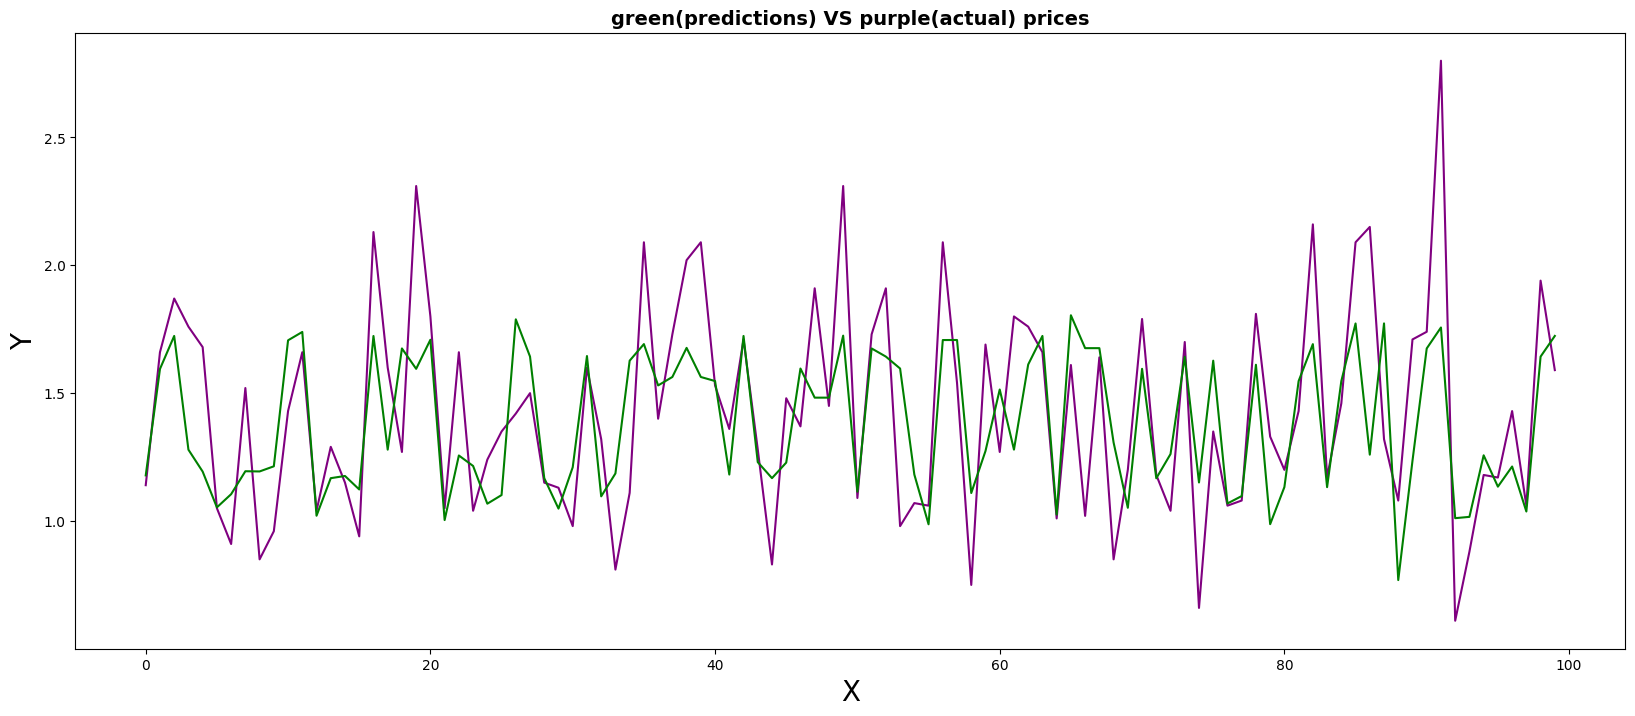

In [336]:
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

## Check by GradientBoostingRegressor

In [337]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_pred = gbr.predict(X_test)

GradientBoostingRegressor_Yury = print_evaluate_r_square_mse_mae(X_test, y_test, gbr_y_pred)


R-squared value of GradientBoostingRegressor: 0.5829994556342931
The mean squared error of GradientBoostingRegressor: 0.06491022457232593
The mean absoluate error of GradientBoostingRegressor: 0.19498430537671843


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

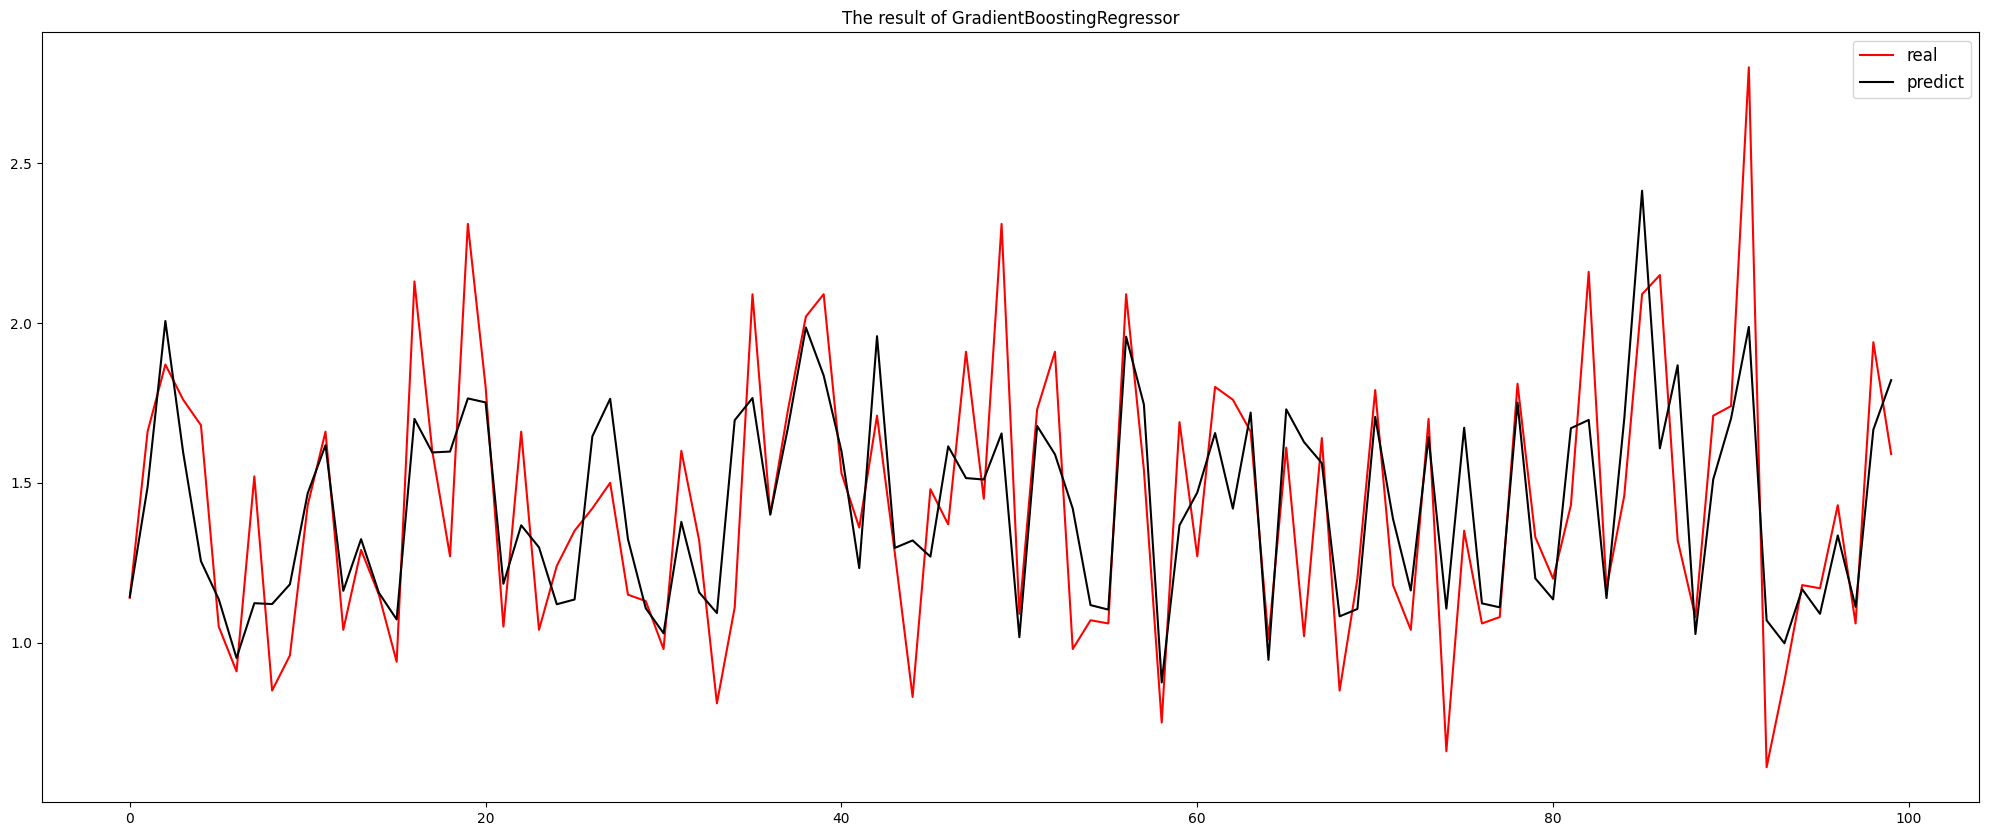

In [338]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Adding Scaler

In [339]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

## NN

In [340]:
nn_model = Sequential()

nn_model.add(Dense(7, input_dim=5, activation='relu'))
nn_model.add(Dense(3, activation='sigmoid'))
# nn_model.add(Dense(7, input_dim=5, activation='relu'))
# nn_model.add(Dense(3, activation='relu'))
# nn_model.add(Dense(1, activation='sigmoid'))


nn_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae', 'mse'])

nn_model_without_early=nn_model.fit(X_train, y_train, validation_split=0.35, epochs=30, batch_size=128)


Epoch 1/30


/home/aypa/.pyenv/versions/3.10.2/envs/venv_homeworks_sdt/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


75/75 [==============================] - 1s 5ms/step - loss: 0.8221 - mae: 0.8221 - mse: 0.8476 - val_loss: 0.7905 - val_mae: 0.7905 - val_mse: 0.7939
Epoch 2/30
75/75 [==============================] - 0s 3ms/step - loss: 0.7396 - mae: 0.7396 - mse: 0.7240 - val_loss: 0.6995 - val_mae: 0.6995 - val_mse: 0.6607
Epoch 3/30
75/75 [==============================] - 0s 3ms/step - loss: 0.6508 - mae: 0.6508 - mse: 0.5954 - val_loss: 0.6151 - val_mae: 0.6151 - val_mse: 0.5386
Epoch 4/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5718 - mae: 0.5718 - mse: 0.4826 - val_loss: 0.5399 - val_mae: 0.5399 - val_mse: 0.4335
Epoch 5/30
75/75 [==============================] - 0s 3ms/step - loss: 0.5103 - mae: 0.5103 - mse: 0.4003 - val_loss: 0.4949 - val_mae: 0.4949 - val_mse: 0.3771
Epoch 6/30
75/75 [==============================] - 0s 3ms/step - loss: 0.4796 - mae: 0.4796 - mse: 0.3631 - val_loss: 0.4743 - val_mae: 0.4743 - val_mse: 0.3540
Epoch 7/30
75/75 [=====================

In [341]:
mse_result = nn_model_without_early.history.get("mse")[29]
print(mse_result)

0.32738158106803894


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


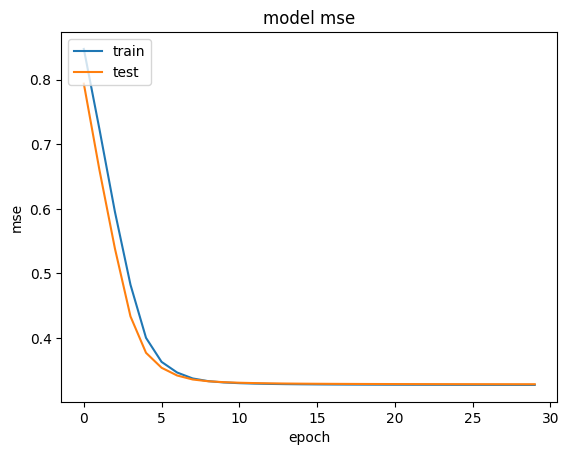

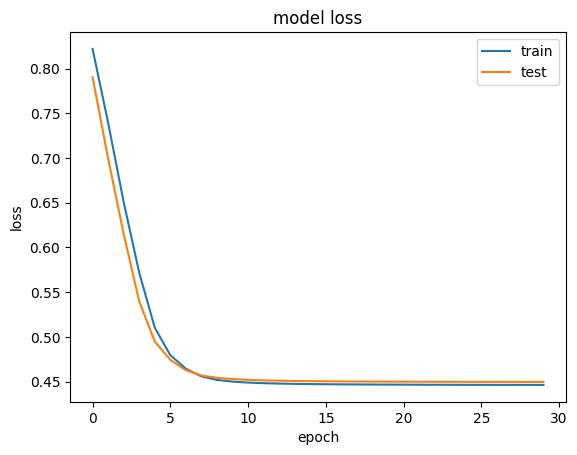

In [342]:
print(nn_model_without_early.history.keys())
# summarize history for accuracy
plt.plot(nn_model_without_early.history['mse'])
plt.plot(nn_model_without_early.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_model_without_early.history['loss'])
plt.plot(nn_model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Check by RandomForestRegressor with scaling

#### Test set

In [343]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)

rfr_y_pred = rfr.predict(X_test)

test = print_evaluate_r_square_mse_mae(X_test, y_test, rfr_y_pred)

R-squared value of GradientBoostingRegressor: -0.044001914925499985
The mean squared error of GradientBoostingRegressor: 0.04486468469900762
The mean absoluate error of GradientBoostingRegressor: 0.15037234703196348


Text(0.5, 1.0, 'The result of RandomForestRegressor')

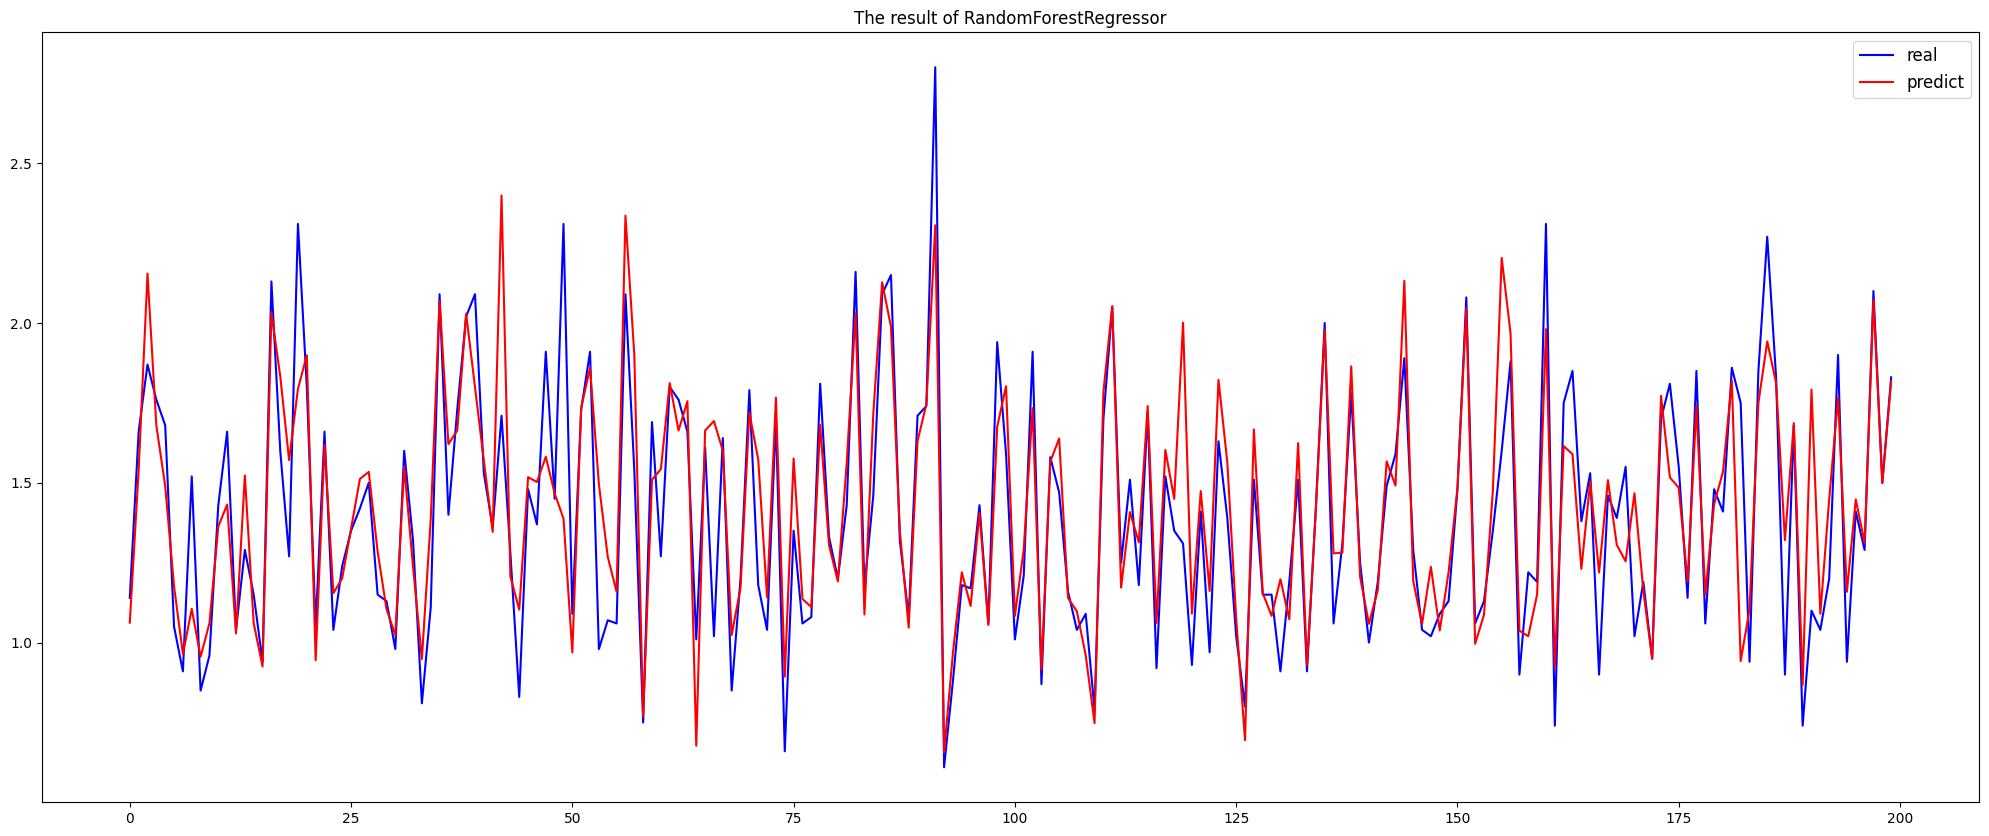

In [344]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_pred[:200],c='red')
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

#### Train set

In [345]:
from sklearn.ensemble import RandomForestRegressor

rfr_reg = RandomForestRegressor(n_estimators=200)  # maybe parameter tuning
rfr_reg.fit(X_train, y_train)

train_pred = rfr_reg.predict(X_train)


print('Testing set evaluation:\n______')
RandomForestRegressor_Yury_test = print_evaluate(y_test, rfr_y_pred)
print('==*******==')
print('Training set evaluation:\n_____')
RandomForestRegressor_Yury_train = print_evaluate(y_train, train_pred)




Testing set evaluation:
______
MAE: 0.15037234703196348
MSE: 0.04486468469900762
RMSE: 0.21181285300710062
R2 Square 0.7117773345332365
______
==*******==
Training set evaluation:
_____
MAE: 0.05645500182698458
MSE: 0.0064454630341825
RMSE: 0.08028364113680009
R2 Square 0.9606354990628142
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

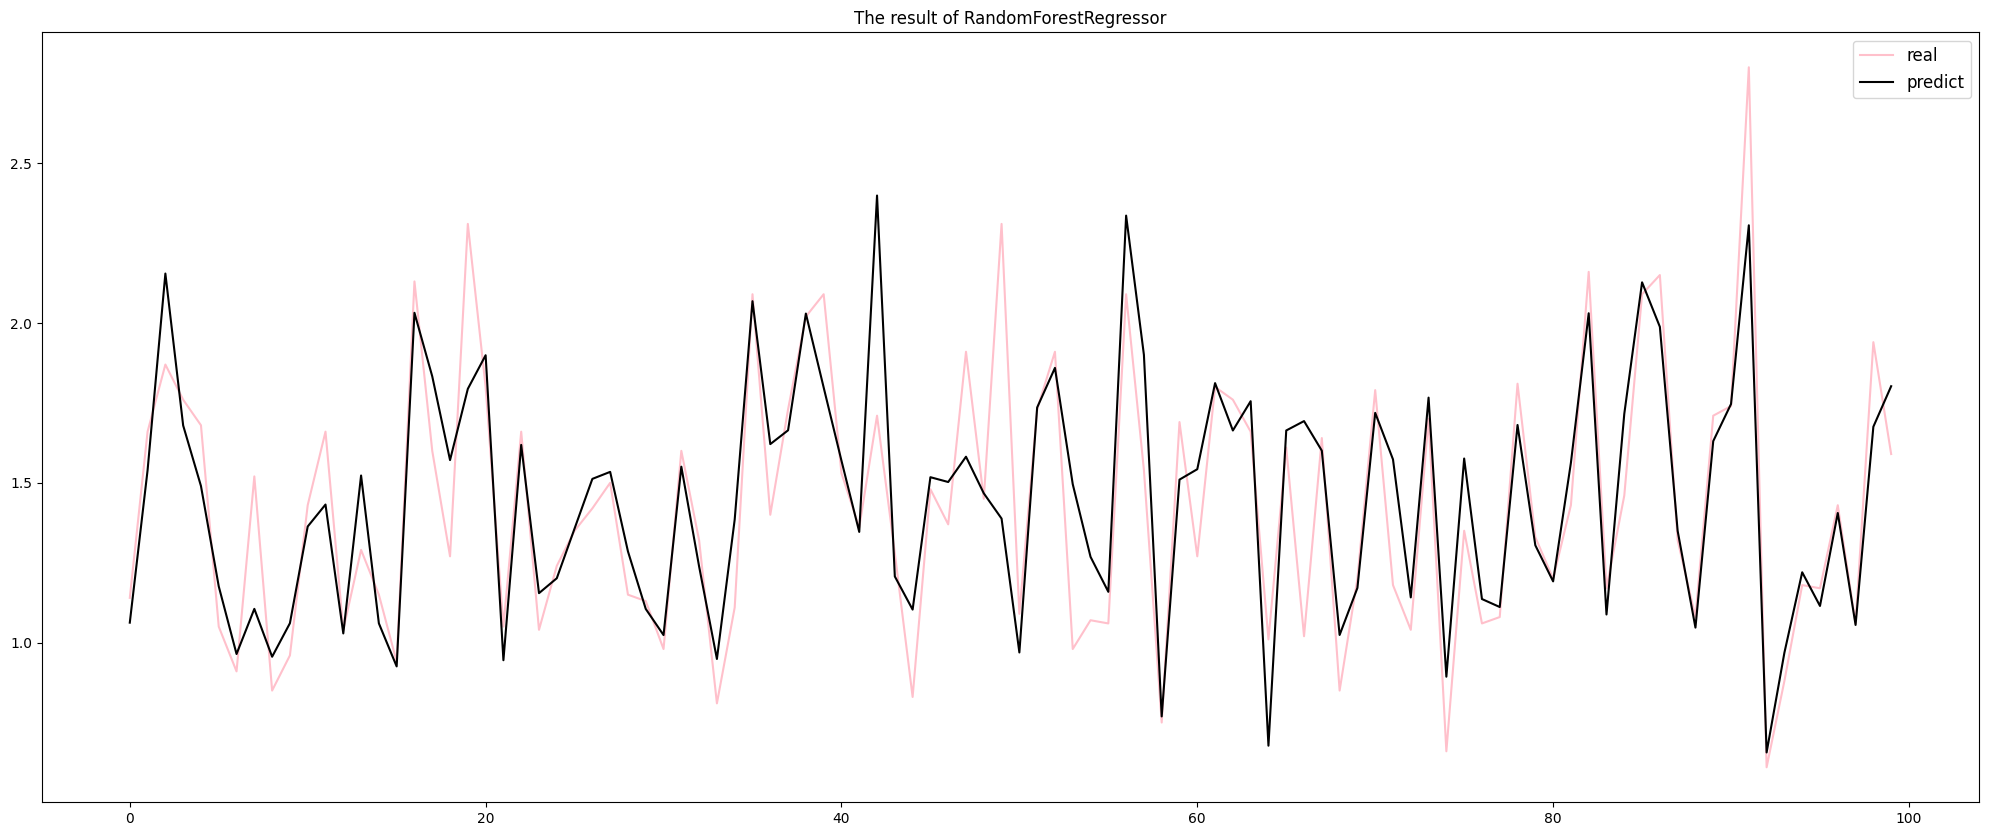

In [346]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(rfr_y_pred[:100],c='black')  #predicts
plt.annotate(
    # Label and coordinate
    'outlier!',
    xy=(13, 62),
    xytext=(3, 65),
    # Custom arrow
    arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

## Check by XGBoost regressor

In [347]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    objective ='reg:linear',
    colsample_bytree = 0.3,
    learning_rate = 0.1,
    max_depth = 5,
    alpha = 10,
    n_estimators = 10
)
xgb_reg.fit(X_train,y_train)

xgb_y_pred = xgb_reg.predict(X_test)

XGBoost_regressor_Yury = print_evaluate(y_test, xgb_y_pred)

[21:53:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.3640235520081977
MSE: 0.21325136819946613
RMSE: 0.46179147696711137
R2 Square -0.3699834997000182
______


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

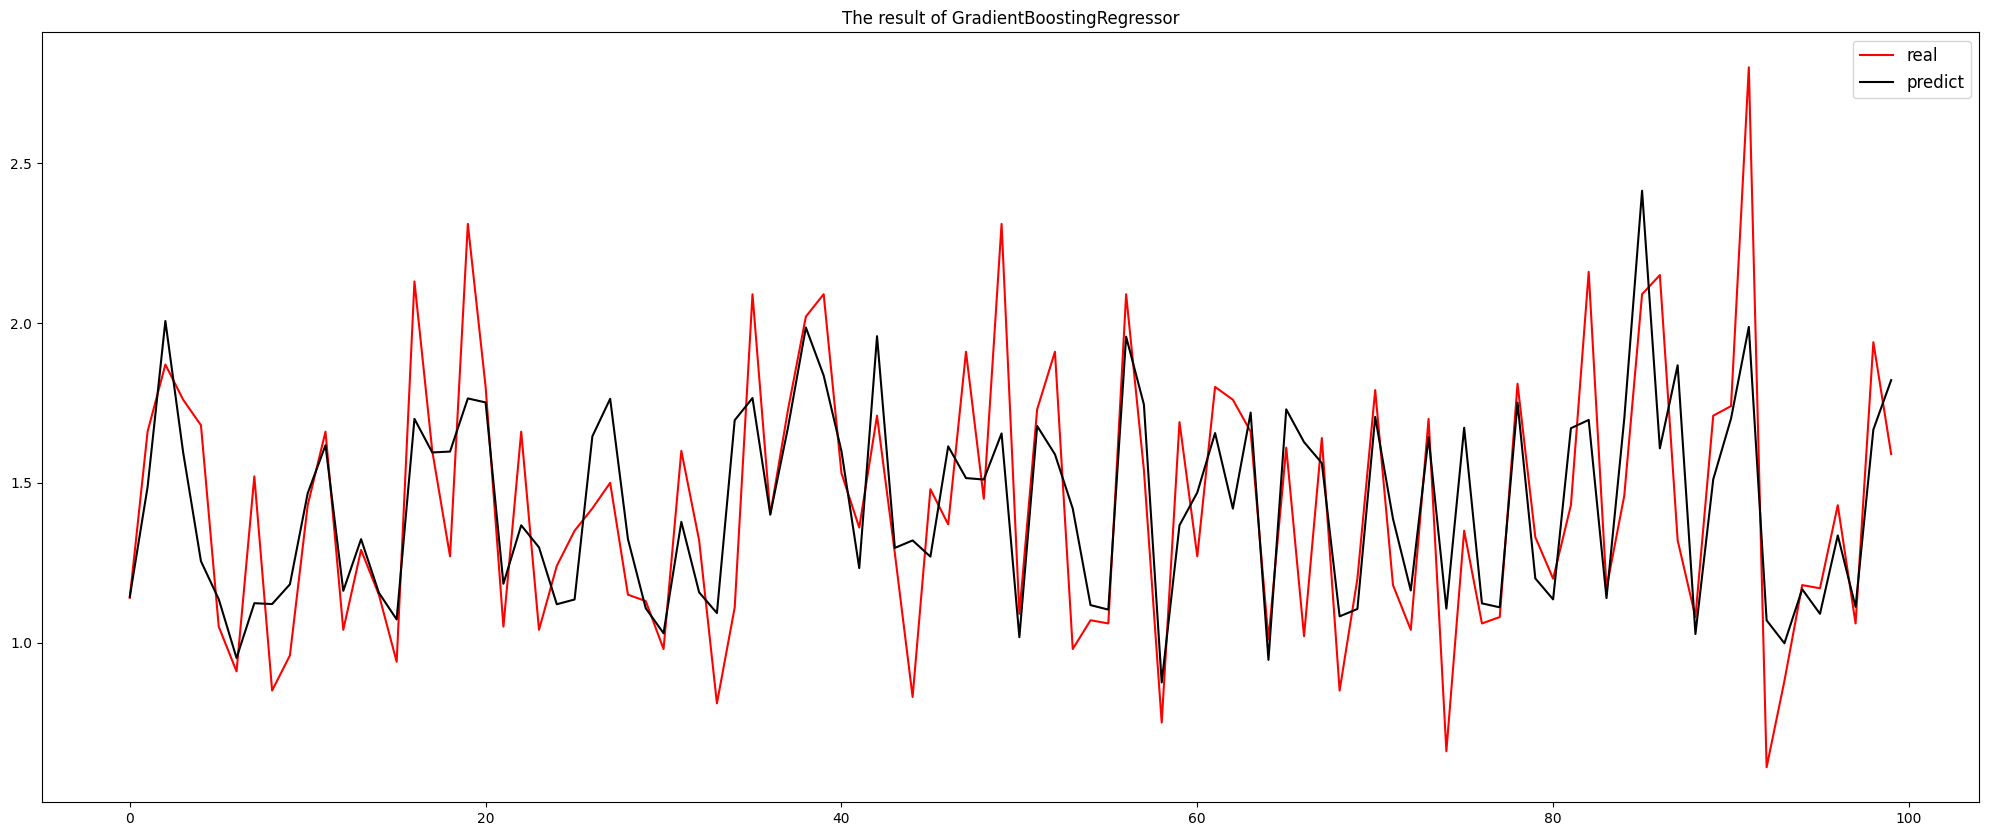

In [348]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='red')
plt.plot(gbr_y_pred[:100],c='black')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

## Comparison of results before and after optimizations

* best values of metrics
* MAE -> 0.0
* MSE -> 0.0
* RMSE -> should be less 180
* R2 Square -> 1.0

#### LinearRegression

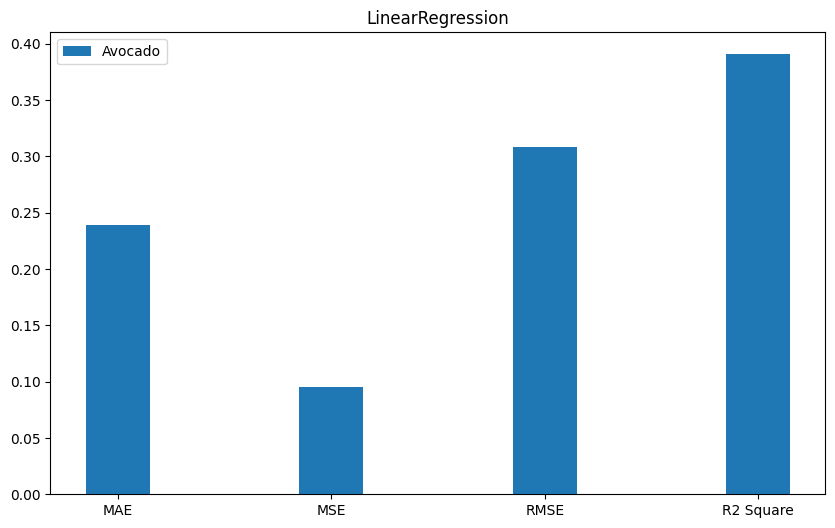

In [349]:
show_df(
    "LinearRegression",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        LinearRegression_Yury
    ]
)

#### GradientBoostingRegressor

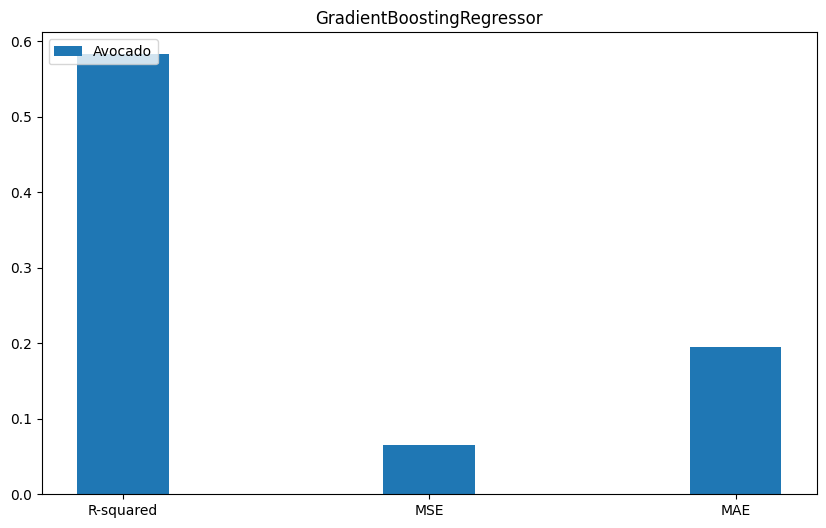

In [350]:
show_df(
    "GradientBoostingRegressor",
    ["R-squared", "MSE", "MAE"],
    [
        GradientBoostingRegressor_Yury
    ]
)

#### RandomForestRegressor - Test set

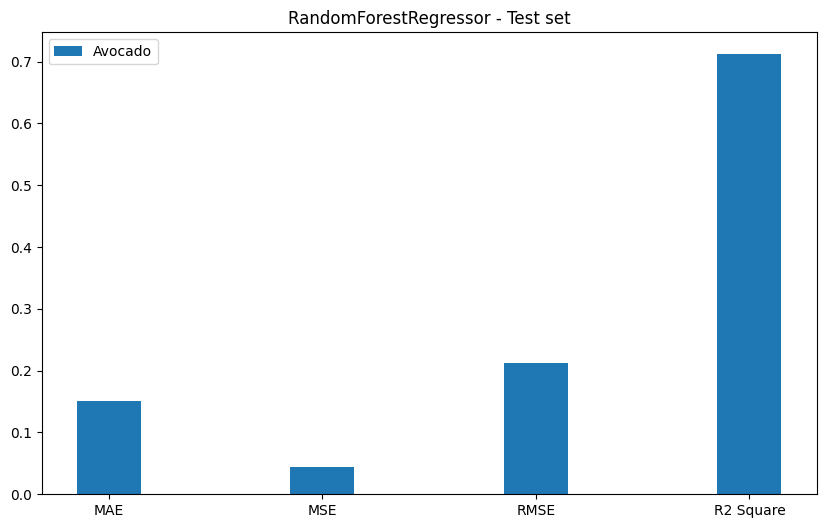

In [351]:
show_df(
    "RandomForestRegressor - Test set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_test
    ]
)

#### RandomForestRegressor - Train set

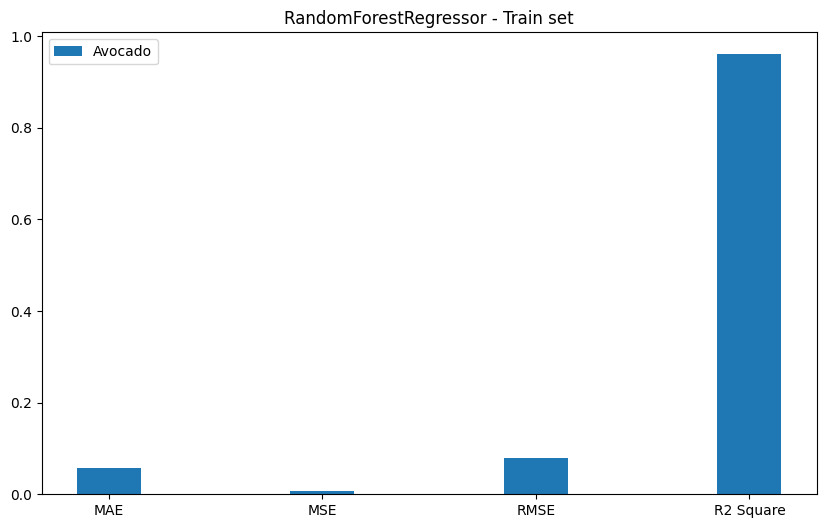

In [352]:
show_df(
    "RandomForestRegressor - Train set",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        RandomForestRegressor_Yury_train
    ]
)

## XGBoost regressor

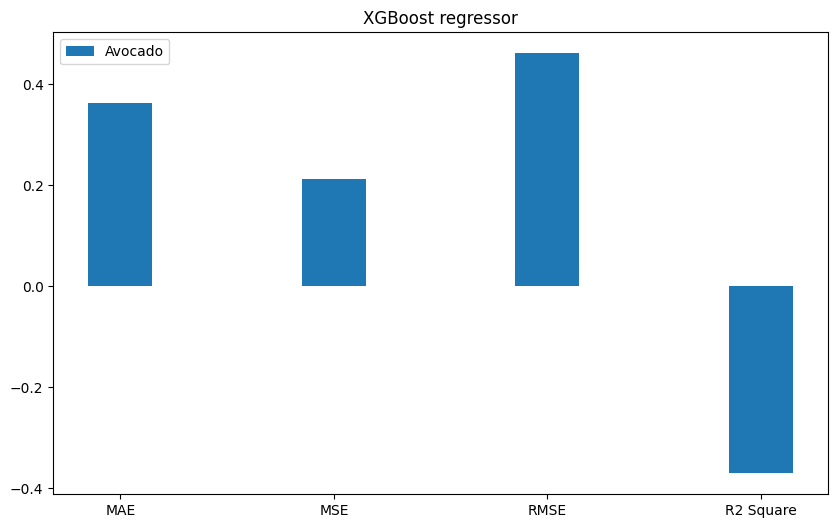

In [353]:
show_df(
    "XGBoost regressor",
    ["MAE", "MSE", "RMSE", "R2 Square"],
    [
        XGBoost_regressor_Yury
    ]
)